# Вступительное задание на стажировку от VK

#### Описание данных: 
файл с упорядоченными данными о 4 компаниях Red, Black, Green, Blue.

#### Цель: 
составить выводы на основе данных. 

## 1. Обзор данных

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
try:
    data = pd.read_excel('Analytic_test.xlsx', header = 1, index_col = 0)
except:
    data = pd.read_excel('datasets/Analytic_test.xlsx', header = 1, index_col = 0)
pd.set_option('display.max_columns', None)

In [27]:
print(data.shape)
data.head()

(100000, 24)


,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,Black_gvm_order_count,Red_android,Green_android,Black_android,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`HID` - зашифрованный персональный индефикатор пользователя компании\
`has_company_id` - наличие зарегистрированного аккаунта в компании\
`company_gmv_total` - суммарный gmv пользователя в сервисе\
`company_gvm_order_count` - кол-во успешных заказов пользователя в сервисе\
`company_android` - установленное у пользователя приложение компании на платформе android\
`company_apple` - установленное у пользователя приложение компании на платформе apple\
`company_web` - установленное у пользователя приложение компании на ПК\
`is_msk` - территориальное расположение в Москве

In [28]:
data.columns.sort_values()

Index(['Black_android', 'Black_apple', 'Black_gvm_order_count',
       'Black_gvm_total', 'Black_web', 'Blue_activity_count', 'Blue_android',
       'Blue_apple', 'Blue_gmv_total', 'Blue_web', 'Green_android',
       'Green_apple', 'Green_gvm_order_count', 'Green_gvm_total', 'Green_web',
       'HID', 'Red_android', 'Red_apple', 'Red_web', 'active_Red',
       'has_Black_id', 'has_Blue_id', 'has_Green_id', 'is_msk'],
      dtype='object')

Неизвестные столбцы:\
`Blue_activity_count`, `active_Red`

Нехватает столбцов:
1. `Blue_gvm_order_count`- можно предположить, что это столбец `Blue_activity_count`, требует уточнения
2. `has_Red_id` - можно предположить, что это столбец `active_Red`, требует уточнения
3. `Red_gmv_total` - скорее всего ошибка данных, требует уточнения
4. `Red_gvm_order_count` - скорее всего ошибка данных, требует уточнения

# 2. Предобработка данных

#### 2.1 Изучим явные дубликаты

In [29]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют. К неявным вернемся позднее.

#### 2.2 Обработем пропуски

In [30]:
display(data.shape)
data.isna().sum()

(100000, 24)

HID                      0
active_Red               0
has_Green_id             0
has_Black_id             0
has_Blue_id              0
Blue_activity_count      0
Blue_gmv_total           1
Green_gvm_total          0
Green_gvm_order_count    0
Black_gvm_total          0
Black_gvm_order_count    0
Red_android              0
Green_android            0
Black_android            0
Blue_android             0
Red_apple                0
Green_apple              0
Black_apple              0
Blue_apple               0
is_msk                   0
Red_web                  0
Green_web                0
Black_web                0
Blue_web                 0
dtype: int64

Посмотрим что это за строка.

In [31]:
data[pd.isnull(data).any(axis=1)]

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,Black_gvm_order_count,Red_android,Green_android,Black_android,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
68383,18f2525eb8c1bbb35625163925171fb63cbb,0.0,1.0,0.0,3.0,4.0,NaN,820.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Удалим эту строку, а `HID` передадим, чтоб разобрались.

In [32]:
data = data.dropna(subset = 'Blue_gmv_total')

#### 2.3 Приведение данных к правильным типам

In [33]:
data.dtypes

HID                       object
active_Red               float64
has_Green_id             float64
has_Black_id             float64
has_Blue_id              float64
Blue_activity_count       object
Blue_gmv_total           float64
Green_gvm_total          float64
Green_gvm_order_count     object
Black_gvm_total          float64
Black_gvm_order_count     object
Red_android              float64
Green_android            float64
Black_android            float64
Blue_android             float64
Red_apple                float64
Green_apple              float64
Black_apple              float64
Blue_apple               float64
is_msk                   float64
Red_web                  float64
Green_web                float64
Black_web                float64
Blue_web                 float64
dtype: object

In [34]:
for name in data.columns.sort_values():
    print("Кол-во уникальных значений столбца", name, len(data[name].unique()))

Кол-во уникальных значений столбца Black_android 2
Кол-во уникальных значений столбца Black_apple 2
Кол-во уникальных значений столбца Black_gvm_order_count 39
Кол-во уникальных значений столбца Black_gvm_total 913
Кол-во уникальных значений столбца Black_web 2
Кол-во уникальных значений столбца Blue_activity_count 69
Кол-во уникальных значений столбца Blue_android 2
Кол-во уникальных значений столбца Blue_apple 2
Кол-во уникальных значений столбца Blue_gmv_total 243
Кол-во уникальных значений столбца Blue_web 2
Кол-во уникальных значений столбца Green_android 2
Кол-во уникальных значений столбца Green_apple 2
Кол-во уникальных значений столбца Green_gvm_order_count 71
Кол-во уникальных значений столбца Green_gvm_total 682
Кол-во уникальных значений столбца Green_web 2
Кол-во уникальных значений столбца HID 99999
Кол-во уникальных значений столбца Red_android 2
Кол-во уникальных значений столбца Red_apple 2
Кол-во уникальных значений столбца Red_web 2
Кол-во уникальных значений столбца

Заметим, что `has_Black_id`, `has_Blue_id`, `has_Green_id` имеет странное кол-во уникальных значений, т.к. значения должны быть только 1 или 0. Скорее всего это ошибка и значение не равные 0, должны быть 1. Проверим эти значения.

In [35]:
data['has_Black_id'].value_counts()

0.0    98920
1.0     1074
2.0        5
Name: has_Black_id, dtype: int64

In [36]:
data['has_Blue_id'].value_counts()

0.0    86734
1.0    12749
2.0      501
3.0       13
4.0        2
Name: has_Blue_id, dtype: int64

In [37]:
data['has_Green_id'].value_counts()

0.0    99114
1.0      881
2.0        4
Name: has_Green_id, dtype: int64

Чтоб исправить это заменим тип строк на `bool`, тогда все значения > 0 заменятся на True. Также изменим тип строк android. apple, web на `bool`.

In [38]:
data['has_Green_id'] = data['has_Green_id'].astype('bool')
data['has_Blue_id'] = data['has_Blue_id'].astype('bool')
data['has_Black_id'] = data['has_Black_id'].astype('bool')

company = ['Blue', 'Green', 'Black', 'Red']
for c in company:
    filt = [f'{c}_android', f'{c}_apple', f'{c}_web']
    for f in filt:
        data[f] = data[f].astype('bool')

In [39]:
print(data['has_Black_id'].value_counts(), '\n')
print(data['has_Blue_id'].value_counts())
data['has_Green_id'].value_counts()

False    98920
True      1079
Name: has_Black_id, dtype: int64 

False    86734
True     13265
Name: has_Blue_id, dtype: int64


False    99114
True       885
Name: has_Green_id, dtype: int64

Теперь разберемся с `Blue_activity_count`, `Black_gvm_order_count`, `Green_gvm_order_count`. Попробуем изменить их тип на numeric, если не получится, подронее рассмотрим данные.

In [40]:
data['Blue_activity_count'] = pd.to_numeric(data['Blue_activity_count'])
data['Blue_activity_count'] = pd.to_numeric(data['Black_gvm_order_count'])
data['Blue_activity_count'] = pd.to_numeric(data['Green_gvm_order_count'])

TypeError: Invalid object type at position 5745

Получили ошибку. Давайте найдем значения которые не являются числами, а перед этим посмотрим строку, где произошла ошибка.

In [41]:
data['Blue_activity_count'][5745]

datetime.datetime(2019, 5, 4, 0, 0)

В столбце с кол-вом оказалась дата, придется удалить такие строки.

In [42]:
data[data['Blue_activity_count'].apply(np.isreal)]

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,Black_gvm_order_count,Red_android,Green_android,Black_android,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
5745,0313e93de96d53257cbf2581d350f3d63b,1.0,False,False,True,2019-05-04 00:00:00,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,0.0,True,False,False,True
12746,0259fecee07db3bb0d936b9c25cbbbd81f,1.0,False,False,True,2019-05-07 00:00:00,0.0,0.0,0.0,0.0,0.0,True,False,False,True,False,False,False,False,1.0,True,False,False,True
27359,0b00f9d33e05f9255631725b5dfbb60fe5,0.0,False,False,True,2019-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,0.0,True,False,False,True
86828,1fb3718325df253c25093bd70d60e657e025,1.0,False,False,True,2019-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,True,False,False,True,True,False,False,True,0.0,True,False,False,False
92309,319bb39259580c39d3780b61830f1315c,1.0,False,False,True,2019-05-03 00:00:00,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,0.0,True,False,False,True
92396,31b255f0253c1d6ddbfdb3f305edc73dc0,1.0,False,False,True,2019-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,0.0,True,False,False,True
92449,31b97b0825bf1b53de9253bd3259025353bb,1.0,False,False,True,2019-05-06 00:00:00,0.0,0.0,0.0,0.0,0.0,True,False,False,True,False,False,False,False,0.0,True,False,False,False


Удалим эти строки и снова изменим тип столбца `Blue_activity_count`

In [43]:
data = data[~(data['Blue_activity_count'].apply(np.isreal))]
data['Blue_activity_count'] = pd.to_numeric(data['Blue_activity_count'])

Аналогично сделаем с `Black_gvm_order_count` и `Green_gvm_order_count`

In [44]:
data[data['Black_gvm_order_count'].apply(np.isreal)]

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,Black_gvm_order_count,Red_android,Green_android,Black_android,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
30040,0bfc8cbc3d25bb2555b33c63ec3350febb,1.0,False,True,True,0.0,0.0,0.0,0.0,3740.0,2019-05-02 00:00:00,True,False,True,False,False,False,False,False,0.0,True,False,True,True
46736,110e2516ebbcf337b7337325fc1839de08,1.0,False,True,False,0.0,0.0,0.0,0.0,3166.0,2019-05-02 00:00:00,False,False,False,False,False,False,False,False,0.0,True,False,False,True
95337,33b0ffc0ee7e125bb6253ddb7b353f253b5,1.0,False,True,False,0.0,0.0,0.0,0.0,12182.0,2019-05-06 00:00:00,False,False,False,False,False,False,False,False,0.0,True,False,True,True


In [45]:
data = data[~(data['Black_gvm_order_count'].apply(np.isreal))]
data['Black_gvm_order_count'] = pd.to_numeric(data['Black_gvm_order_count'])

In [46]:
data[data['Green_gvm_order_count'].apply(np.isreal)]

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,Black_gvm_order_count,Red_android,Green_android,Black_android,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
1633,0096b565be05dbe3e60e6810f3cb6b38,1.0,True,False,True,0.0,0.0,4330.0,2019-05-04 00:00:00,0.0,0.0,True,True,False,True,False,False,False,False,1.0,True,False,False,False
62820,16ee996903d01e10e5c058bb17e6b8fb,0.0,True,False,True,1.0,16.0,2918.0,2019-05-04 00:00:00,0.0,0.0,True,True,False,True,False,False,False,False,1.0,True,False,False,False
99338,325193deb3d325d259d17dcb3fe95bb59025,0.0,True,False,True,2.0,0.0,2272.0,2019-05-02 00:00:00,0.0,0.0,True,True,False,True,False,False,False,False,1.0,True,False,True,True


In [47]:
data = data[~(data['Green_gvm_order_count'].apply(np.isreal))]
data['Green_gvm_order_count'] = pd.to_numeric(data['Green_gvm_order_count'])

In [48]:
print(data.shape)
data.dtypes

(99986, 24)


HID                       object
active_Red               float64
has_Green_id                bool
has_Black_id                bool
has_Blue_id                 bool
Blue_activity_count      float64
Blue_gmv_total           float64
Green_gvm_total          float64
Green_gvm_order_count    float64
Black_gvm_total          float64
Black_gvm_order_count    float64
Red_android                 bool
Green_android               bool
Black_android               bool
Blue_android                bool
Red_apple                   bool
Green_apple                 bool
Black_apple                 bool
Blue_apple                  bool
is_msk                   float64
Red_web                     bool
Green_web                   bool
Black_web                   bool
Blue_web                    bool
dtype: object

Пришлось убрать данные о 14 пользователях, что может сказаться на выводы. Нужно передать о некорректости этих данных.

#### 2.4 Изменим названия колонок

`active_Red` изменим на `has_Red_id`, данные схожи, но нужно было бы уточнить.\
`Blue_activity_count` изменим на `Blue_gvm_order_count`\
`Black_gvm_total` изменим на `Black_gmv_total`\
`Green_gvm_total` изменим на `Green_gmv_total`

In [79]:
data.rename(columns = {"active_Red" : "has_Red_id", "Blue_activity_count" : "Blue_gvm_order_count",
                       "Black_gvm_total" : "Black_gmv_total", "Green_gvm_total" : "Green_gmv_total"}, inplace = True)
data['has_Red_id'] = data['has_Red_id'].astype('bool')

In [50]:
data.columns.sort_values()

Index(['Black_android', 'Black_apple', 'Black_gvm_order_count',
       'Black_gvm_total', 'Black_web', 'Blue_android', 'Blue_apple',
       'Blue_gmv_total', 'Blue_gvm_order_count', 'Blue_web', 'Green_android',
       'Green_apple', 'Green_gvm_order_count', 'Green_gvm_total', 'Green_web',
       'HID', 'Red_android', 'Red_apple', 'Red_web', 'has_Black_id',
       'has_Blue_id', 'has_Green_id', 'has_Red_id', 'is_msk'],
      dtype='object')

#### 2.5 Проверим аномальные значения

In [51]:
print("Пользователей компании Blue:", data['has_Blue_id'].sum())
print("Пользователей компании Blue, использующих android:", data['Blue_android'].sum())
print("Пользователей компании Blue, использующих apple:", data['Blue_apple'].sum())
print("Пользователей компании Blue, использующих PC:", data['Blue_web'].sum())
print()
print("Пользователей компании Green:", data['has_Green_id'].sum())
print("Пользователей компании Green, использующих android:", data['Green_android'].sum())
print("Пользователей компании Green, использующих apple:", data['Green_apple'].sum())
print("Пользователей компании Green, использующих PC:", data['Green_web'].sum())
print()
print("Пользователей компании Black:", data['has_Black_id'].sum())
print("Пользователей компании Black, использующих android:", data['Black_android'].sum())
print("Пользователей компании Black, использующих apple:", data['Black_apple'].sum())
print("Пользователей компании Black, использующих PC:", data['Black_web'].sum())
print()
print("Пользователей компании Red:", data['has_Red_id'].sum())
print("Пользователей компании Red, использующих android:", data['Red_android'].sum())
print("Пользователей компании Red, использующих apple:", data['Red_apple'].sum())
print("Пользователей компании Red, использующих PC:", data['Red_web'].sum())

Пользователей компании Blue: 13254
Пользователей компании Blue, использующих android: 8041
Пользователей компании Blue, использующих apple: 4645
Пользователей компании Blue, использующих PC: 10631

Пользователей компании Green: 882
Пользователей компании Green, использующих android: 543
Пользователей компании Green, использующих apple: 616
Пользователей компании Green, использующих PC: 198

Пользователей компании Black: 1076
Пользователей компании Black, использующих android: 1076
Пользователей компании Black, использующих apple: 1782
Пользователей компании Black, использующих PC: 1458

Пользователей компании Red: 55864
Пользователей компании Red, использующих android: 32125
Пользователей компании Red, использующих apple: 10873
Пользователей компании Red, использующих PC: 67095


В компании Black и Red пользователей PC больше чем активных пользователей, чего быть не может, следовательно в данных ошибка. Изменим has_company_id на 0, если есть хотя бы одна 1 среди android, apple или web.

In [52]:
def change_company_id(row):
    colors = ['Blue', 'Green', 'Black', 'Red']
    for color in colors:
        filt = [f'has_{color}_id', f'{color}_android', f'{color}_apple', f'{color}_web']
        if(not row[filt[0]] and (row[filt[1]] or row[filt[2]] or row[filt[3]])):
            row[filt[0]] = True
    return row
data = data.apply(lambda row: change_company_id(row), axis=1)

#### 2.6 Изучим неявные дубликаты

Неявных дубликатов нету, т.к. все данные числовые и `HID` не повторяется.

# 3 Анализ

#### 3.1 Чем больше пользователей, тем успешнее сервис (больше GMV)

In [53]:
print("Пользователей компании Blue:", data['has_Blue_id'].sum())
print("Пользователей компании Blue, использующих android:", data['Blue_android'].sum())
print("Пользователей компании Blue, использующих apple:", data['Blue_apple'].sum())
print("Пользователей компании Blue, использующих PC:", data['Blue_web'].sum())
print()
print("Пользователей компании Green:", data['has_Green_id'].sum())
print("Пользователей компании Green, использующих android:", data['Green_android'].sum())
print("Пользователей компании Green, использующих apple:", data['Green_apple'].sum())
print("Пользователей компании Green, использующих PC:", data['Green_web'].sum())
print()
print("Пользователей компании Black:", data['has_Black_id'].sum())
print("Пользователей компании Black, использующих android:", data['Black_android'].sum())
print("Пользователей компании Black, использующих apple:", data['Black_apple'].sum())
print("Пользователей компании Black, использующих PC:", data['Black_web'].sum())
print()
print("Пользователей компании Red:", data['has_Red_id'].sum())
print("Пользователей компании Red, использующих android:", data['Red_android'].sum())
print("Пользователей компании Red, использующих apple:", data['Red_apple'].sum())
print("Пользователей компании Red, использующих PC:", data['Red_web'].sum())

Пользователей компании Blue: 27696
Пользователей компании Blue, использующих android: 8041
Пользователей компании Blue, использующих apple: 4645
Пользователей компании Blue, использующих PC: 10631

Пользователей компании Green: 1783
Пользователей компании Green, использующих android: 543
Пользователей компании Green, использующих apple: 616
Пользователей компании Green, использующих PC: 198

Пользователей компании Black: 4499
Пользователей компании Black, использующих android: 1076
Пользователей компании Black, использующих apple: 1782
Пользователей компании Black, использующих PC: 1458

Пользователей компании Red: 81255
Пользователей компании Red, использующих android: 32125
Пользователей компании Red, использующих apple: 10873
Пользователей компании Red, использующих PC: 67095


Проверим гипотезу, что компании с большим кол-вом активных пользователей более успешные. Проблема, что данных по компании Red почти нету, т.к. отсутствуют столбцы `Red_gmv_total` и `Red_gvm_order_count`. Придется убрать из анализа эту компанию. 

In [80]:
df_without_red = data.query("has_Green_id or has_Black_id or has_Blue_id").copy()
df_without_red.drop(["has_Red_id", "Red_android", "Red_apple", "Red_web"], axis= 1 , inplace= True)
df_without_red.shape

(30176, 20)

Кол-во пользователей сократилось больше чем втрое. Необходимо сообщить о компании Red.

In [84]:
print(df_without_red['Blue_gmv_total'].sum())
df_without_red['Blue_gmv_total'].describe()

246098.0


count    30176.000000
mean         8.155422
std        230.500680
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      32302.000000
Name: Blue_gmv_total, dtype: float64

In [85]:
print(df_without_red['Black_gmv_total'].sum())
df_without_red['Black_gmv_total'].describe()

9468220.0


count     30176.000000
mean        313.766569
std        3081.643748
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      188252.000000
Name: Black_gmv_total, dtype: float64

In [86]:
print(df_without_red['Green_gmv_total'].sum())
df_without_red['Green_gmv_total'].describe()

5983080.0


count    30176.000000
mean       198.272800
std       2233.980521
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      94106.000000
Name: Green_gmv_total, dtype: float64

Несмотря на то, что компания Blue самая большая по кол-ву пользователей (за исключением Red), в ней самая маленькая сумма GMV и средний показатель на одного пользователя. Значит у Blue пользователи не готовы покупать товары, ей нужно посмотреть почему пользователи не покупают ничего. Самая успешная компания Black с самым большим средним GMV на пользователя. 

Вывод: по имеющимся данным мы не можем сказать, что чем больше пользователей, тем более успешный сервис. Компании Blue следует проанализировать, почему ее пользователи не готовы покупать на сайте. Также следует исправить данные о компании Red. 

#### 3.2 Пользователи из Москвы имеют большую ценность для компаний. 

In [93]:
df_is_msk = df_without_red.query("is_msk == 1").copy()
df_not_msk = df_without_red.query("is_msk == 0").copy()

In [97]:
df_is_msk["total_gmv"] = df_is_msk["Black_gmv_total"] + df_is_msk["Green_gmv_total"] + df_is_msk["Blue_gmv_total"]
df_not_msk["total_gmv"] = df_not_msk["Black_gmv_total"] + df_not_msk["Green_gmv_total"] + df_not_msk["Blue_gmv_total"]

In [118]:
df_not_msk['total_gmv'].describe()

count     24478.000000
mean        258.090939
std        2719.130168
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      188252.000000
Name: total_gmv, dtype: float64

In [117]:
df_is_msk['total_gmv'].describe()

count      5698.000000
mean       1646.164970
std        7054.764891
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      118074.000000
Name: total_gmv, dtype: float64

Заметим, что среднее на пользователя в Москве в 6.5 раз выше, даже с учетом, что максимальное выше не в Москве. Т.е. люди в Москве более платежноспособные и компании с них получают больше. 

#### 3.3 Корреляция кол-ва заказов и их GMV

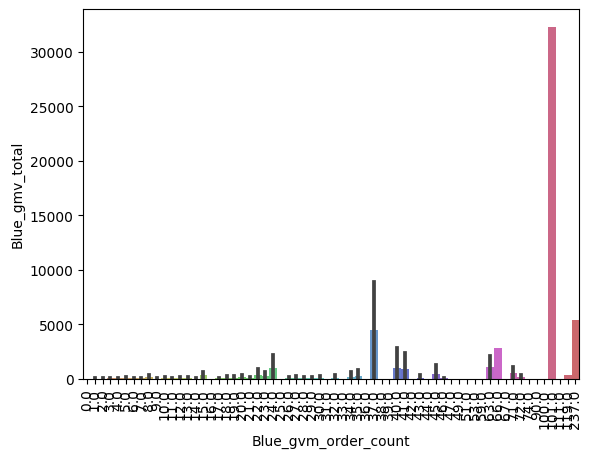

In [143]:
sns.barplot(data = df_without_red, width = 1, x = 'Blue_gvm_order_count', y = 'Blue_gmv_total', palette = 'hls')
plt.xticks(rotation=90)
plt.show()

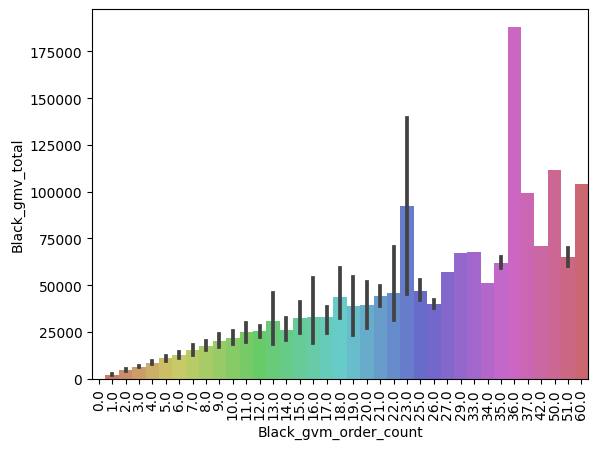

In [142]:
sns.barplot(data = df_without_red, width = 1, x = 'Black_gvm_order_count', y = 'Black_gmv_total', palette = 'hls')
plt.xticks(rotation=90)
plt.show()

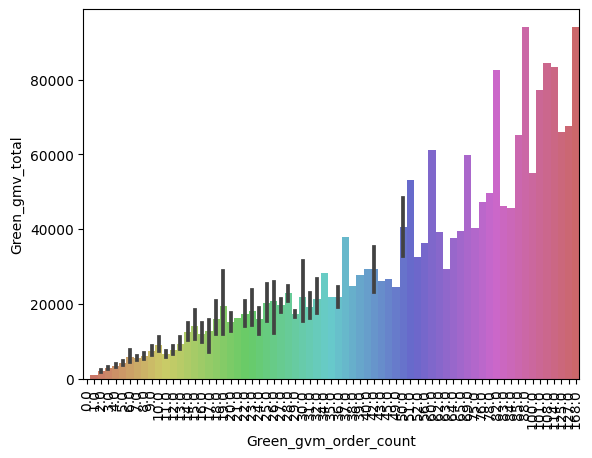

In [141]:
sns.barplot(data = df_without_red, width = 1, x = 'Green_gvm_order_count', y = 'Green_gmv_total', palette = 'hls')
plt.xticks(rotation=90)
plt.show()

У компаний Green и Black прослеживается корреляция между кол-вом и суммарным GMV. У компании Blue не прослеживается эта корреляция, видно что компания держится на клиентах с большим кол-вом заказов, что еще раз подтверждает, что компании Blue надо пересмотреть свои действия. 

# 4 Выводы

1. Данные не целые, нет основных данных о компании Red
2. Есть ошибки в названии хранимых данных
3. В компаниях не прослеживается корреляция кол-во пользователей и суммарный GMV, слишком мало данных
4. Пользователи из Москвы представляют большую ценность для компаний
5. Наблюдается корреляция кол-ва заказов и суммарным GMV
6. Компания Blue имеет низкие показатели, ей требуется пересмотреть свои дейтсвия.